In [1]:
import torch

In [2]:
fn = './ko.tok.vec'

In [3]:
def load_vectors(fn):
    with open(fn, 'r') as f:
        total_cnt, vec_size = list(map(int, f.readline().strip().split(' ')))
        
        words, embs = [], []
        for line in f:
            line = line.strip().split(' ')
            word = line[0]
            emb = list(map(float, line[1:]))
            
            words += [word]
            embs += [torch.FloatTensor(emb)]
            
        embs = torch.stack(embs)
        
        print('Read %d words and each word embedding vector has %d elements.' % (len(words), embs.size(1)))
        
        return words, embs

In [4]:
words, embs = load_vectors(fn)

Read 3589 words and each word embedding vector has 256 elements.


In [5]:
u, s, v = torch.svd(embs)

print(u.size())
print(s.size())
print(v.size())

torch.Size([3589, 256])
torch.Size([256])
torch.Size([256, 256])


In [6]:
import urllib.request
FONT_URL = 'https://cdn.rawgit.com/spoqa/spoqa-han-sans/01ff0283/Subset/SpoqaHanSans/SpoqaHanSansRegular.ttf'

urllib.request.urlretrieve(FONT_URL, 'SpoqaHanSansRegular.ttf')

('SpoqaHanSansRegular.ttf', <http.client.HTTPMessage at 0x10da2ee80>)

In [7]:
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='SpoqaHanSansRegular.ttf', size=15)

In [8]:
def visualize(words, u):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(16, 16))
    for i in range(len(words)):
        plt.scatter(u[i, 0], u[i, 1])
        plt.annotate(words[i], (u[i, 0], u[i, 1]), fontproperties=font)
    plt.show()

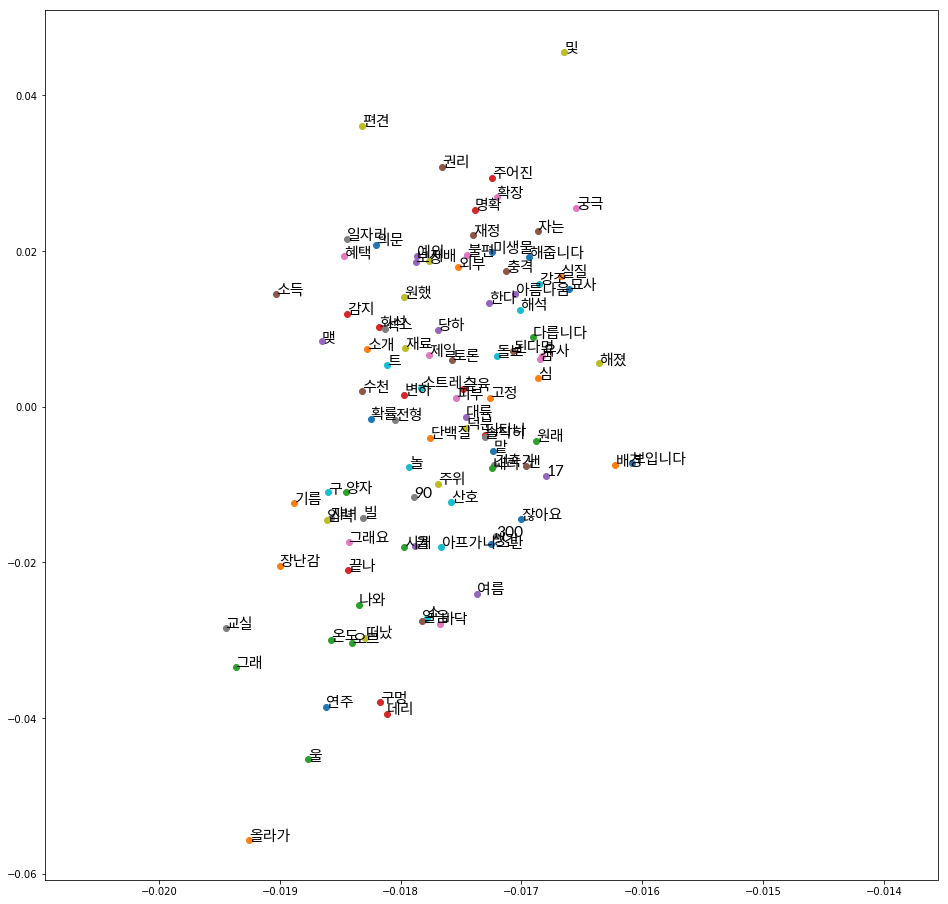

In [10]:
offset = 1500
cnt = 100
visualize(words[offset:offset + cnt], u[offset:offset + cnt])